# TP 5 : Espaces vectoriels

Consignes :

- TP à faire par groupes de 2. Le groupe de travail sera le même pour toute l'année.
- Renommer ce fichier <b>nom1-nom2-TP5</b> , en cliquant sur le titre du fichier "TP 5 - Espaces vectoriels" en haut à gauche
- TP à rendre dans le devoir Teams à la <b>fin de la séance</b>.

- <u>Votre rendu doit contenir des explications. Les notebook avec blocs de code sans aucun contexte seront penalisées.</u>


  Cliquer deux fois sur la cellule pour completer ci-dessous :

- NOM PRENOM : 
- NOM PRENOM :

  <u><i> Prenez le temps de réviser les concepts liés aux matrices, vecteurs, systèmes d'équations linéaires, ... des séances de TP précédentes. </i> </u>

# Exercice 1 : Interpolation polynomiale

Considérons le problème suivant: on cherche un polynôme  $P(X)$  à coefficients réels dont le graphe passe par les points

$$ (1,4), \ (2,-1), \ (3,2), \ (4,3), \ (5, 1). $$
 
a) Soit  $V $ l'espace vectoriel des polynômes de degré  $\leq 4$ et $f: V \to \mathbb{R}^5$   l'application linéaire définie par

$$ f(P) = (P(1), P(2), P(3), P(4), P(5)) $$
 
Construire informatiquement une matrice  $A$  représentant  $f$  en calculant tout d'abord  $f(1), \ f(X), \ f(X^2), \ f(X^3), \ f(X^4).$



In [70]:
A=matrix([[1,1,1,1,1],
         [1,2,4,8,16],
         [1,3,9,27,81],
         [1,4,16,64,256],
         [1,5,25,125,625]])
show(A)
var('a')
var('b')
var('c')
var('d')
var('e')
V=matrix([[a],[b],[c],[d],[e]])
f=A*V
show(A,V,"=",f)
def matriceA(x):
    valeurs = [1, 2, 3, 4, 5] #valeurs des abscisses des points donnés dans l'énoncé
    matrice = [] #liste qui contiendra des listes représentants les lignes
    for i in range(x):
        ligne = [] 
        for j in range(x):
            ligne.append(valeurs[i]^j)
        matrice.append(ligne) #on ajoute la ligne a la matrice
    show(Matrix(matrice))
    #on convertit la liste matrice en Matrice et on l'affiche
C=matriceA(5)
#C.transpose()

[  1   1   1   1   1]
[  1   2   4   8  16]
[  1   3   9  27  81]
[  1   4  16  64 256]
[  1   5  25 125 625]

[  1   1   1   1   1]
[  1   2   4   8  16]
[  1   3   9  27  81]
[  1   4  16  64 256]
[  1   5  25 125 625] [a]
[b]
[c]
[d]
[e] '=' [             a + b + c + d + e]
[    a + 2*b + 4*c + 8*d + 16*e]
[   a + 3*b + 9*c + 27*d + 81*e]
[ a + 4*b + 16*c + 64*d + 256*e]
[a + 5*b + 25*c + 125*d + 625*e]

[  1   1   1   1   1]
[  1   2   4   8  16]
[  1   3   9  27  81]
[  1   4  16  64 256]
[  1   5  25 125 625]

b) Vérifier la validité de votre matrice  $A$  de la question précédente en l'utilisant pour calculer  $f(Q)$  et $ f(R)$  avec  $Q(X) = X^3 - X + 1$ et $R(X) = 2X^4 - 1$  (et vérifiez que vous obtenez bien les bonnes réponses !).

In [71]:
var('x')
Q(x)=x**3-x+1
R(x)=2*x**4-1
QM=Matrix([[1],[-1],[0],[1],[0]])
RM=Matrix([[-1],[0],[0],[0],[2]])
show(A*QM)
show(A*RM)

[  1]
[  7]
[ 25]
[ 61]
[121]

[   1]
[  31]
[ 161]
[ 511]
[1249]

c) Pour revenir à la question initiale: convainquez-vous que  $f$  est bijective en remarquant que  $A$  est inversible, et déterminez  $f^{-1}(4,-1,2,3,1)$ en utilisant $A^{-1}$.

In [66]:
A=matrix([[1,1,1,1,1],
         [1,2,4,8,16],
         [1,3,9,27,81],
         [1,4,16,64,256],
         [1,5,25,125,625]])
show(A)
det(A)
#Le determinant de A est non-nul donc A est inversible
#Une application linéaire f : R^n → R^n est bijective si et seulement si sa matriceassociée A = Mat(f) ∈ Mn(R) est inversible
# Donc f est bijective car A est inversible
B=A.inverse()
show(B)


[  1   1   1   1   1]
[  1   2   4   8  16]
[  1   3   9  27  81]
[  1   4  16  64 256]
[  1   5  25 125 625]

[     5    -10     10     -5      1]
[-77/12  107/6  -39/2   61/6 -25/12]
[ 71/24  -59/6   49/4  -41/6  35/24]
[ -7/12   13/6     -3   11/6  -5/12]
[  1/24   -1/6    1/4   -1/6   1/24]

d) Représenter sur une même figure: le graphe du polynôme  $P$  obtenu à la question précédente ainsi que les  $5 $ points $(1,4), (2,-1), (3,2), (4,3), (5, 1)$  pour vérifier que  $P$  passe bien par ceux-ci.


# Exercice 2 : Intérpolation d'Hermite

Encore un problème où on cherche un polynôme: on cherche cette fois-ci un polynôme  $P$  de degré  $\leq 3$  pour lequel

$$P(0)=1, P′(0)=−2, P(1)=4, P′(1)=2$$
 
a) Donner une représentation matricielle de l'application $P \mapsto (P(0), P'(0), P(1), P'(1))$.

In [4]:
A = Matrix([[1,0,1,0], #Creation de la matrice
            [0,1,1,1],
            [0,0,1,2],
            [0,0,1,3]])

show(transpose(A)) # Affichage matrice 
A = transpose(A)

[1 0 0 0]
[0 1 0 0]
[1 1 1 1]
[0 1 2 3]

b) Vérifier que votre représentation matricielle fonctionne bien en l'utilisant pour calculer l'image de   $Q(X) = X^3 + X^2 - X + 1$ et $R(X) = X^2 + 3 X$.

In [5]:
QX = matrix([[1],[-1],[1],[1]])  # Creation de la matrice QX
show(A*QX)#Affichage
RX = matrix([[0],[3],[1],[0]])# Creation de la matrice RX
show(A*RX) #Affichage

[ 1]
[-1]
[ 2]
[ 4]

[0]
[3]
[4]
[5]

c) Montrer qu'il existe un unique polynôme de degré inférieur ou égal $ 3$  satisfaisant les conditions imposées et déterminez-le.

In [6]:
print("Le déterminant de A est :") 
show(det(A)) #afficage du déterminant de la matrice A

print("Le determinant de la matrice A est 1 donc la matrice A est inversible")
show(A.inverse()*matrix([[1],[-2],[4],[2]]))  # Je multiplie par l'inverse de la matrice 

show("Le polynôme est -6x³ + 11x² - 2x + 1") #affichage

Le déterminant de A est :


1

Le determinant de la matrice A est 1 donc la matrice A est inversible


[ 1]
[-2]
[11]
[-6]

'Le polynôme est -6x³ + 11x² - 2x + 1'

d) Représentez, sur une même figure, le graphe du polynôme trouvé à la question précédente, les points  $(0,1)$  et  $(1,4)$  ainsi que ses tangentes en  $x=0$  et  $x=1$  pour vérifier la cohérence de votre réponse.

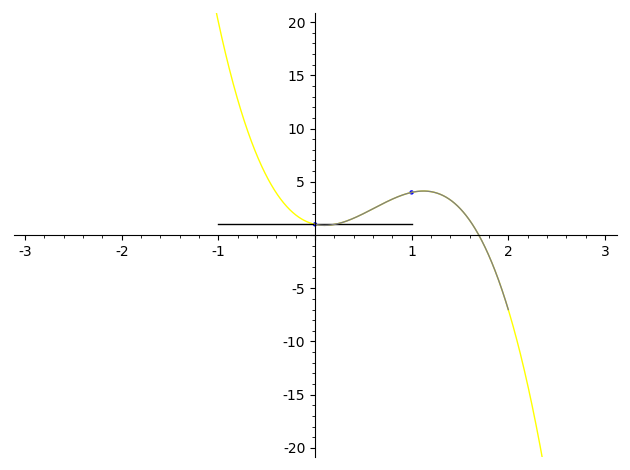

In [7]:
#Representation du graphe du polynome ainsi que ses tangentes
T(X) = -6*(X^3) + 11*(X^2) - 2*X + 1
point([[0,1],[1,4]]) + plot(T(X), (x, -3, 3), ymin=-20, ymax=20,color='yellow') + plot(T(0), color='black') + plot(T(), (x, 0, 2), color='grey')
# La courbe noire represente la tangente x = 0 et en gris la tangante x = 1